## 1. ndarray

In [1]:
from mxnet import nd

In [2]:
# row vector
x = nd.arange(12)
x


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
<NDArray 12 @cpu(0)>

In [3]:
# boardcasting
a = nd.arange(3).reshape((3, 1))
b = nd.arange(2).reshape((1, 2))
a, b

(
 [[0.]
  [1.]
  [2.]]
 <NDArray 3x1 @cpu(0)>, 
 [[0. 1.]]
 <NDArray 1x2 @cpu(0)>)

In [4]:
a + b


[[0. 1.]
 [1. 2.]
 [2. 3.]]
<NDArray 3x2 @cpu(0)>

## 2. autogradient

In [5]:
from mxnet import autograd

In [6]:
x = nd.arange(4).reshape((4, 1))
# using attach_grade to allocate memory for gradient
x.attach_grad()

with autograd.record():
    y = 2 * nd.dot(x.T, x)

y.backward()

In [7]:
x.grad, x.grad == 4 * x

(
 [[ 0.]
  [ 4.]
  [ 8.]
  [12.]]
 <NDArray 4x1 @cpu(0)>, 
 [[1.]
  [1.]
  [1.]
  [1.]]
 <NDArray 4x1 @cpu(0)>)

In [8]:
def f(a):
    """
    if with python conditional and loop control, we can also calculate gradient
    """
    b = a * 2
    while b.norm().asscalar() < 1000:
        b = b * 2
    if b.sum().asscalar() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [9]:
a = nd.random.normal(shape=1)
a.attach_grad()
with autograd.record():
    c = f(a)
c.backward()

In [10]:
a.grad == c / a


[1.]
<NDArray 1 @cpu(0)>

In [11]:
a = nd.random.normal(shape=(2, 2))
a.attach_grad()
with autograd.record():
    c = f(a)
c.backward()

In [12]:
a.grad == c / a


[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)>

In [13]:
# print autograd
print(dir(autograd))

['CFUNCTYPE', 'Function', 'Lock', 'MXCallbackList', 'NDArray', 'NDArrayHandle', 'POINTER', 'Symbol', 'SymbolHandle', '_GRAD_REQ_MAP', '_LIB', '_RecordingStateScope', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_ndarray_cls', '_parse_head', 'absolute_import', 'array', 'backward', 'c_array', 'c_array_buf', 'c_handle_array', 'c_int', 'c_void_p', 'cast', 'check_call', 'ctypes', 'division', 'get_symbol', 'grad', 'is_recording', 'is_training', 'mark_variables', 'mx_uint', 'pause', 'predict_mode', 'record', 'set_recording', 'set_training', 'string_types', 'traceback', 'train_mode']


## 3. Linear Regression

In [14]:
from IPython.display import set_matplotlib_formats
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

%matplotlib inline

In [15]:
# generate dataset
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels = nd.random.normal(scale=0.01, shape=labels.shape)

In [16]:
features[0], labels[0]

(
 [-1.2347414 -1.771029 ]
 <NDArray 2 @cpu(0)>, 
 [-0.0080038]
 <NDArray 1 @cpu(0)>)

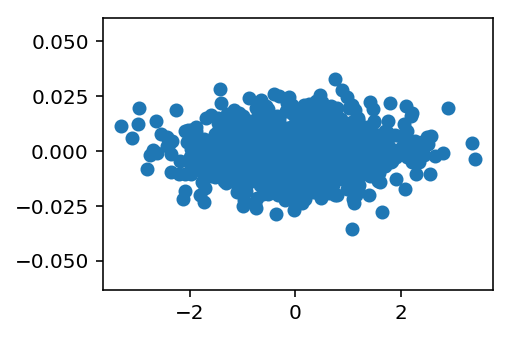

In [17]:
def set_figsize(figsize=(3.5, 2.5)):
    # set retina
    set_matplotlib_formats('retina')
    # set size of graphic
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy())

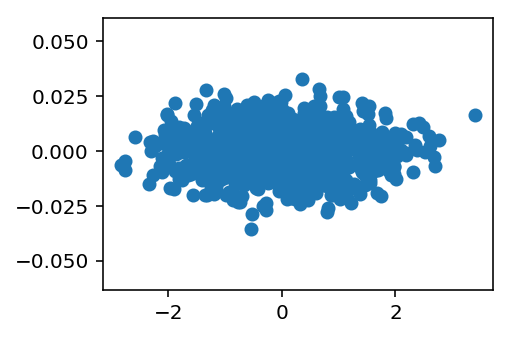

In [18]:
plt.scatter(features[:, 0].asnumpy(), labels.asnumpy())